## Joseph Rochelle
## DSC 530
## Chapters 11 and 12

**Chapter 11 exercises:**
The purpose of exercise 11-1, 11-3, and 11-4 is to work through regression analysis. 

In [1]:
#Intalling Libraries and funcitons
%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

import first
import nsfg
import patsy
import re
import statsmodels.formula.api as smf

In [7]:
## FOr 11-3 we have to join the data so we take this from the prior chapter lesson. 
# Reminder we are using preset up data models from ThinkStats2
import nsfg

live = live[live.prglngth>30]
resp = nsfg.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [2]:
# We import the first libary then lgenth of pregancy is great than 30 using the live.preg variable and >30
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]

In [4]:
#The stats model library was imported then the model created of preg length, birth order being 1 and race being 2 with live births great than 1
#These all have Pvalues that show they are statistically significant. 

model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.28
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           5.09e-22
Time:                        17:31:52   Log-Likelihood:                -18247.
No. Observations:                8884   AIC:                         3.650e+04
Df Residuals:                    8880   BIC:                         3.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039   1006.410      0.000      38.686      38.837
birthord == 1[T.True]     0.1015      0.040      2.528      0.011       0.023       0.180
race == 2[T.True]         0.1390      0.042      3.311      0.001       0.057       0.221
nbrnaliv > 1[T.True]     -1.4944      0.164     -9.086      0.000      -1.817      -1.172
==============================================================================
Omnibus:                     1587.470   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.751
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called poisson. It works the same way as ols and logit. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called numbabes.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?

In [15]:
#Using the stats model again the dependant variable will turn into 1/0 so we can use Poisson regression. 
# We also know that the numbbabes from prior classes is messy so we replace 97 with nan. 
#Next we will look at the age count to join

join.numbabes.replace([97], np.nan, inplace=True)
join['age2'] = join.age_r**2



In [16]:
formula='numbabes ~ age_r + age2 + age3 + C(race) + totincr + educat'
formula='numbabes ~ age_r + age2 + C(race) + totincr + educat'
model = smf.poisson(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.677002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numbabes   No. Observations:                 8884
Model:                        Poisson   Df Residuals:                     8877
Method:                           MLE   Df Model:                            6
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                 0.03686
Time:                        17:40:05   Log-Likelihood:                -14898.
converged:                       True   LL-Null:                       -15469.
Covariance Type:            nonrobust   LLR p-value:                3.681e-243
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0324      0.169     -6.098      0.000      -1.364      -0.701
C(race)[T.2]    -0.1401      0.015     -9.479      0.000      -0.169      -0.111
C(race)[T.3]    -0.0991      0.025     -4.029      0.000      -0.147      -0.051
age_r            0.1556      0.010     15.006      0.000       0.135       0.176
age2            -0.0020      0.000    -13.102      0.000      -0.002      -0.002
totincr         -0.0187      0.002     -9.830      0.000      -0.022      -0.015
educat          -0.0471      0.003    -16.076      0.000      -0.053      -0.041
================================================================================
"""

In [17]:
# Now we predict the number of children for a woman who is 35, black, and gollge grad
#The results are 2
columns = ['age_r', 'age2', 'age3', 'race', 'totincr', 'educat']
new = pd.DataFrame([[35, 35**2, 35**3, 1, 14, 16]], columns=columns)
results.predict(new)

0    2.496802
dtype: float64

**Exercise:** If the quantity you want to predict is categorical, you can use multinomial logistic regression, which is implemented in StatsModels with a function called mnlogit. As an exercise, let’s use it to guess whether a woman is married, cohabitating, widowed, divorced, separated, or never married; in the NSFG dataset, marital status is encoded in a variable called rmarital.

Suppose you meet a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000. What is the probability that she is married, cohabitating, etc?

In [18]:
## Logistic regression is True/False so the variable we are using is the martrial status for the MNLogit
#Below is also the formula for the dependant variables to the independant
#We name the model using the smf fucntionearlier with MNLOGIT being the name of the model
#Results are set to fit and summary

formula='rmarital ~ age_r + age2 + C(race) + totincr + educat'
model = smf.mnlogit(formula, data=join)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.084053
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               rmarital   No. Observations:                 8884
Model:                        MNLogit   Df Residuals:                     8849
Method:                           MLE   Df Model:                           30
Date:                Sat, 18 Jul 2020   Pseudo R-squ.:                  0.1682
Time:                        17:41:25   Log-Likelihood:                -9630.7
converged:                       True   LL-Null:                       -11579.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
  rmarital=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0156      0.805     11.199      0.000       7.438      10.593
C(race)[T.2]    -0.9237      0.089    -10.418      0.000      -1.097      -0.750
C(race)[T.3]    -0.6179      0.136     -4.536      0.000      -0.885      -0.351
age_r           -0.3635      0.051     -7.150      0.000      -0.463      -0.264
age2             0.0048      0.001      6.103      0.000       0.003       0.006
totincr         -0.1310      0.012    -11.337      0.000      -0.154      -0.108
educat          -0.1953      0.019    -10.424      0.000      -0.232      -0.159
--------------------------------------------------------------------------------
  rmarital=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9570      3.020      0.979      0.328      -2.963       8.877
C(race)[T.2]    -0.4411      0.237     -1.863      0.062      -0.905       0.023
C(race)[T.3]     0.0591      0.336      0.176      0.860      -0.600       0.718
age_r           -0.3177      0.177     -1.798      0.072      -0.664       0.029
age2             0.0064      0.003      2.528      0.011       0.001       0.011
totincr         -0.3258      0.032    -10.175      0.000      -0.389      -0.263
educat          -0.0991      0.048     -2.050      0.040      -0.194      -0.004
--------------------------------------------------------------------------------
  rmarital=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5238      1.205     -2.924      0.003      -5.886      -1.162
C(race)[T.2]    -0.3213      0.093     -3.445      0.001      -0.504      -0.139
C(race)[T.3]    -0.7706      0.171     -4.509      0.000      -1.106      -0.436
age_r            0.1155      0.071      1.626      0.104      -0.024       0.255
age2            -0.0007      0.001     -0.701      0.483      -0.003       0.001
totincr         -0.2276      0.012    -19.621      0.000      -0.250      -0.205
educat           0.0667      0.017      3.995      0.000       0.034       0.099
--------------------------------------------------------------------------------
  rmarital=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8963      1.305     -2.220      0.026      -5.453      -0.339
C(race)[T.2]    -1.0407      0.104    -10.038      0.000      -1.244      -0.837
C(race)[T.3]    -0.5661      0.156     -3.635      0.000      -0.871      -0.261
age_r            0.2411      0.079      3.038      0.002       0.086       0.397
age2            -0.0035      0.001     -2.977      0.003      -0.006      -0.001
totincr         -0.2932      0.015    -20.159      0.000      -0.322      -0.265
educat          -0.0174      0.021     -0.813      0.416      -0.059       0.025
-

Make a prediction for a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000.

In [20]:
#The prediction is 75% that the person is not married using 0 for that index
#THe index of 1 tells us there is 13% chance they would be not married but living with a partner.

columns = ['age_r', 'age2', 'race', 'totincr', 'educat']
new = pd.DataFrame([[25, 25**2, 2, 11, 12]], columns=columns)
results.predict(new)

,0,1,2,3,4,5
0,0.750028,0.126397,0.001564,0.033403,0.021485,0.067122


**Chapter 12 Exercises:**
The purpose of this lesson is to cover the time series analysis

**Exercise:** The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [24]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [25]:
def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

In [26]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

In [27]:
dailies = GroupByQualityAndDay(transactions)

In [28]:
#Pulling the function that has the quadric class
def RunQuadraticModel(daily):
    """Runs a linear model of prices versus years.

    daily: DataFrame of daily prices

    returns: model, results
    """
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [29]:
name = 'high'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          4.57e-164
Time:                        17:50:08   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The following classes and functions had to be pulled from the chapter exercies to work:**

In [34]:
## Doing a sercies of class and functions
import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

In [35]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [36]:
def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).
    
    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

In [37]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color='gray')

In [39]:
def PlotFittedValues(model, results, label=''):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

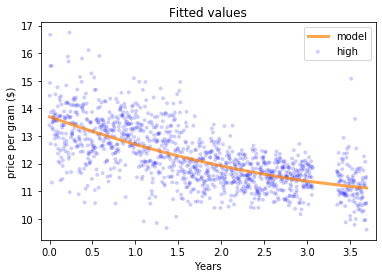

In [40]:
PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years',
                 xlim=[-0.1, 3.8],
                 ylabel='price per gram ($)')

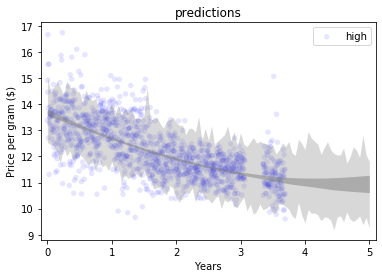

In [41]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Price per gram ($)')

Both modes indicate how over time there will be a decrease in price per grams. The last model shows ome of the volaity with peaks and valleys

**Exercise:** Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [46]:
## Pulling forward prior classes
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [47]:

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [48]:
## The first value is the correlation and the second is the pvalue showing significant at P<0.001.
## Reminder that most data show 0.0 for P>0.001

## Testing correlation between consecutive prices
name = 'high'
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.485229376194738 0.0


In [49]:
# Low correlatation , Still significant 

# test for serial correlation in residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue) 

0.07570473767506261 0.005


In [50]:

#Low correlation, Still significant
# test for serial correlation in residuals of the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.05607308161289916 0.044
